# Pset1 5

In [1]:
from __future__ import print_function
import time, os, json
import numpy as np
import matplotlib.pyplot as plt
import quasars as q
import fisher_scoring as fs

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### Load the data

In [2]:
raw_train, raw_test, wavelengths = q.load_data()

### Let's take a look at our data

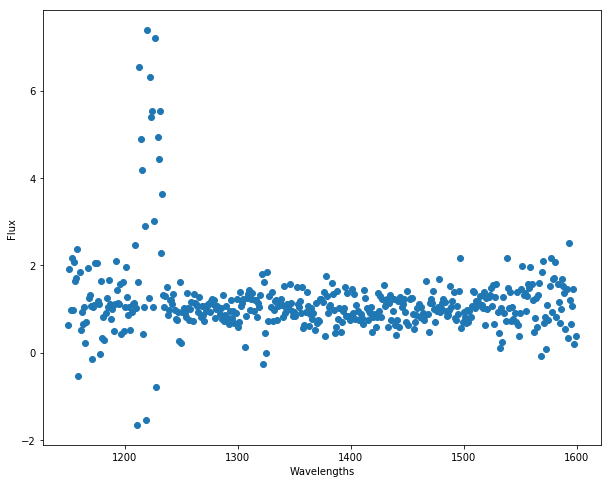

In [3]:
plt.ylabel('Flux')
plt.xlabel('Wavelengths')

plt.scatter(wavelengths, raw_train[0])
plt.suptitle('Data')
plt.show()

In [101]:
print(wavelengths.shape)
print(raw_train.shape)

(450,)
(200, 450)


In [49]:
X = wavelengths.reshape((wavelengths.shape[0],1))
Y = raw_train[0]

## 5b

### Part i

Part b.i) Theta=[2.5134, -0.0010]


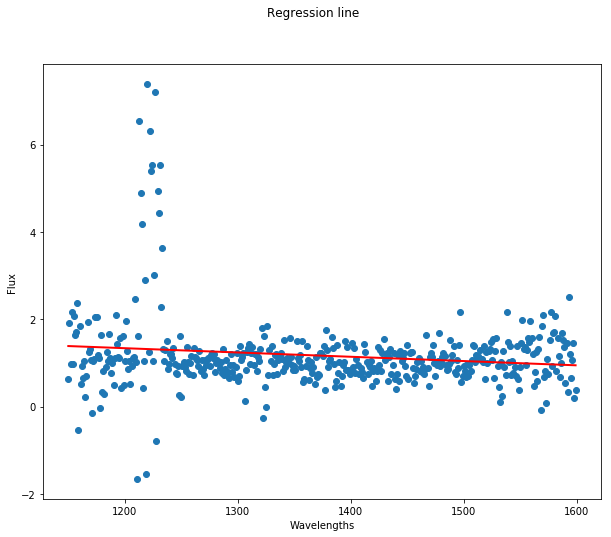

In [54]:
lr_est, theta = q.LR_smooth(Y, X)
print('Part b.i) Theta=[%.4f, %.4f]' % (theta[0], theta[1]))
q.plot_b(X, Y, lr_est, 'Regression line')

### Part ii

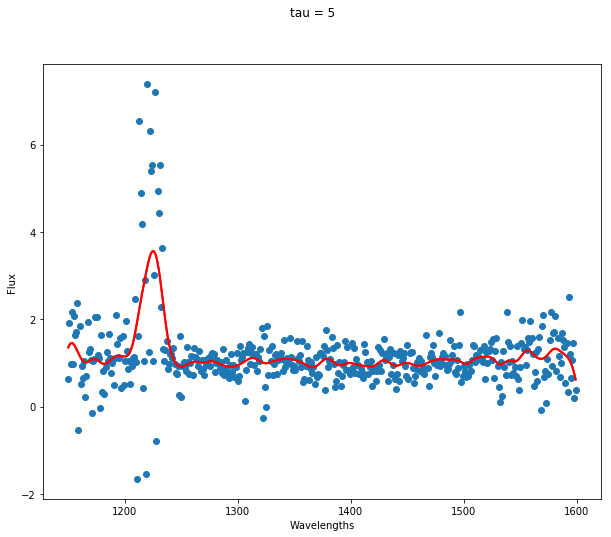

In [55]:
lwr_est_5 = q.LWR_smooth(Y, X, 5)
q.plot_b(X, Y, lwr_est_5, 'tau = 5')

### Part iii

In [56]:
lwr_est_1 = q.LWR_smooth(Y, X, 1)
lwr_est_10 = q.LWR_smooth(Y, X, 10)
lwr_est_100 = q.LWR_smooth(Y, X, 100)
lwr_est_1000 = q.LWR_smooth(Y, X, 1000)

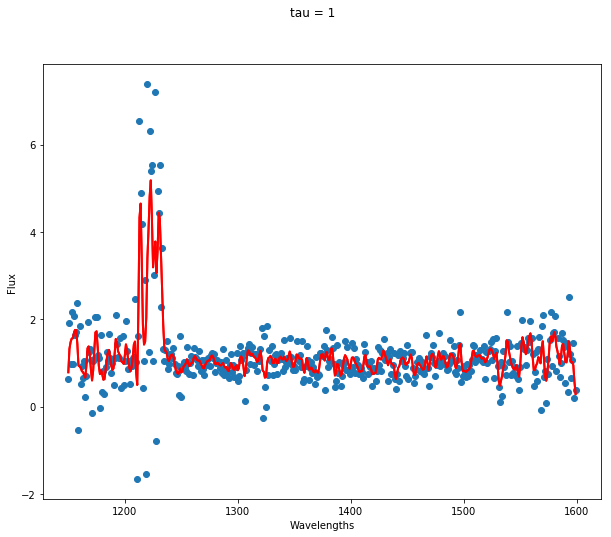

In [57]:
q.plot_b(X, Y, lwr_est_1, 'tau = 1')

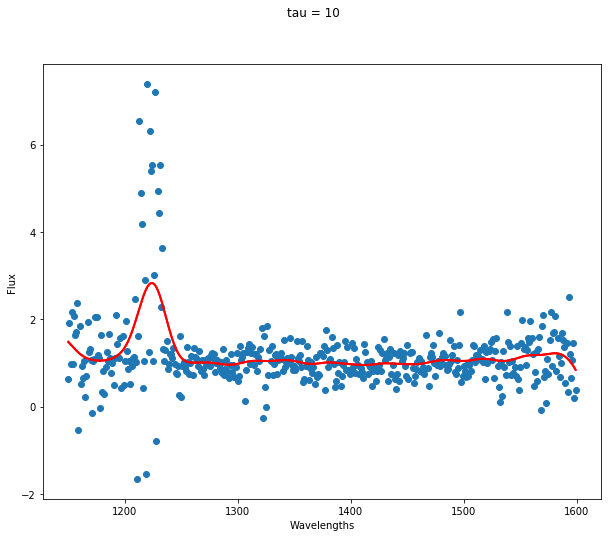

In [58]:
q.plot_b(X, Y, lwr_est_10, 'tau = 10')

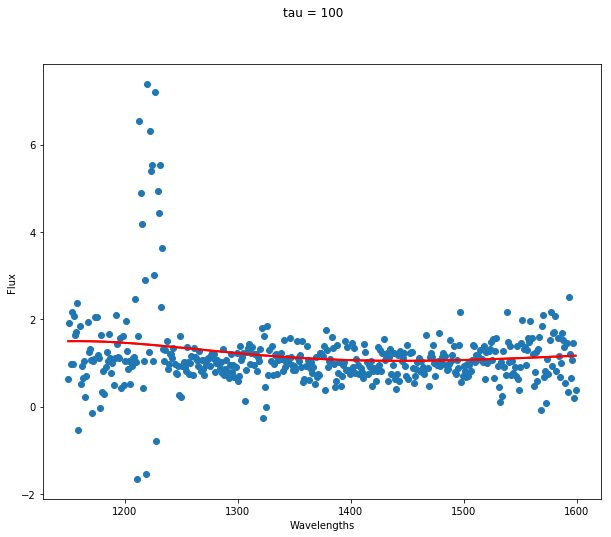

In [59]:
q.plot_b(X, Y, lwr_est_100, 'tau = 100')

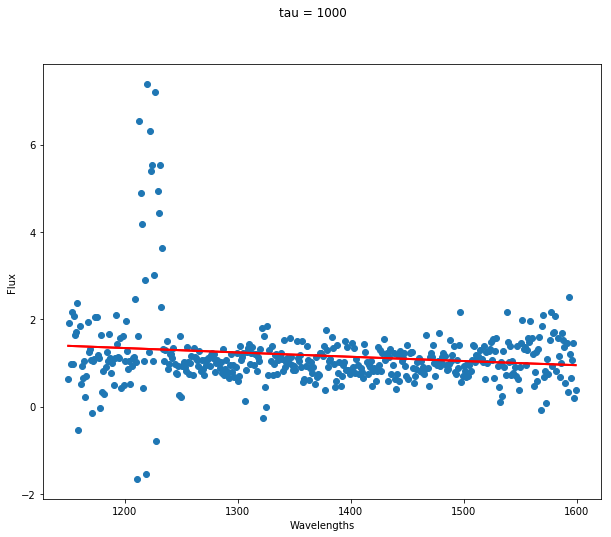

In [60]:
q.plot_b(X, Y, lwr_est_1000, 'tau = 1000')

As tau increases, the curve becomes smoother, all the way down to a flat line with tau=1000. As tau decreases, the line becomes less smooth and more noisy.

## 5c

### Part i

In [4]:
X = wavelengths.reshape((wavelengths.shape[0],1))
print(X.shape)
print(raw_train.shape)
smooth_train, smooth_test = [q.smooth_data(raw, X, 5) for raw in [raw_train, raw_test]]

(450, 1)
(200, 450)


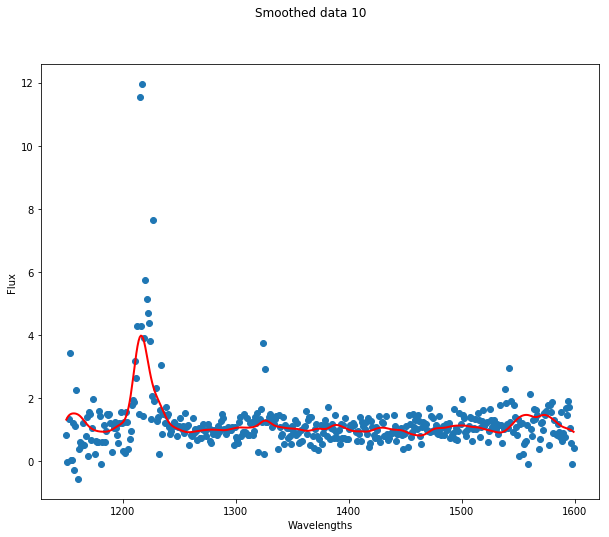

In [62]:
q.plot_b(X, raw_train[10], smooth_test[10], 'Smoothed data 10')

### Part ii

In [32]:
fhats, mean_error = q.fhat_left(smooth_train, smooth_train)
print('Part c.ii) Training error: %.4f' % mean_error)

Part c.ii) Training error: 1.0664


### Part iii

In [33]:
fhats, mean_error = q.fhat_left(smooth_train, smooth_test)
print('Part c.iii) Training error: %.4f' % mean_error)

Part c.iii) Training error: 2.3615


In [36]:
print(smooth_test.shape)

(50, 450)


In [37]:
fhats0, mean_error0 = q.fhat_left(smooth_train, smooth_test[0].reshape((1, smooth_test.shape[1])))
fhats5, mean_error5 = q.fhat_left(smooth_train, smooth_test[5].reshape((1, smooth_test.shape[1])))

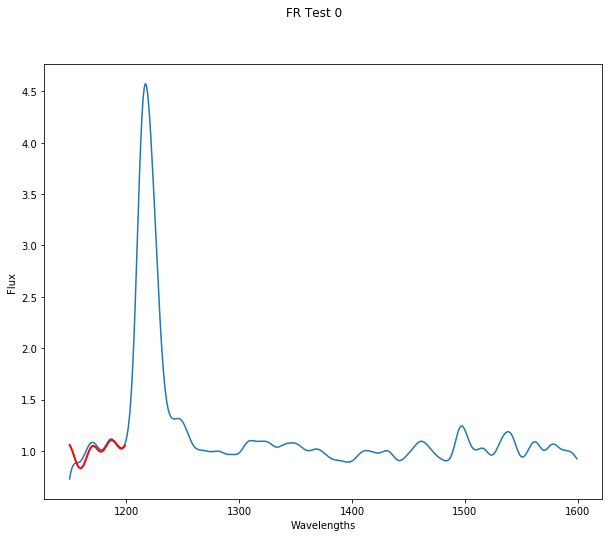

In [41]:
q.plot_c(wavelengths, smooth_test[0], fhats0.reshape((50, 1)), 'FR Test 0', '')

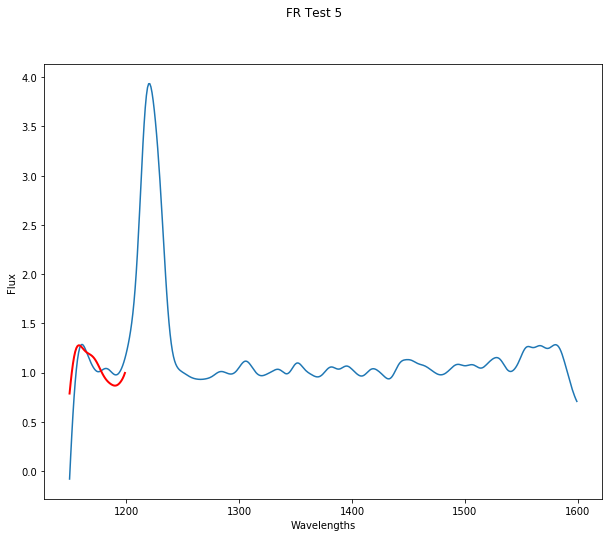

In [42]:
q.plot_c(wavelengths, smooth_test[5], fhats5.reshape((50, 1)), 'FR Test 5', '')

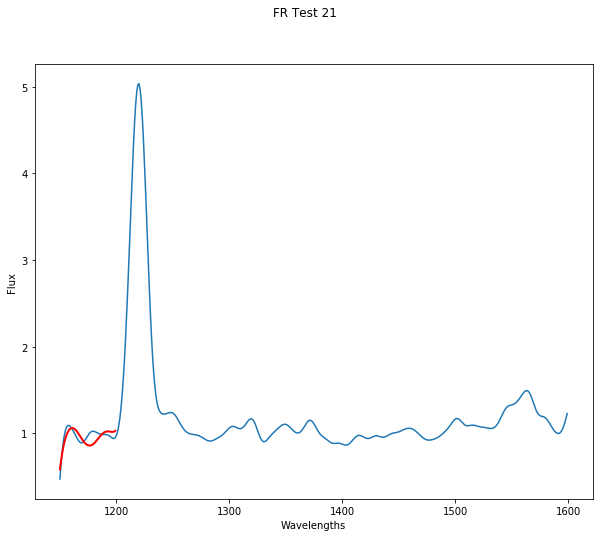

In [48]:
fhats21, mean_error21 = q.fhat_left(smooth_train, smooth_test[21].reshape((1, smooth_test.shape[1])))
q.plot_c(wavelengths, smooth_test[21], fhats21.reshape((50, 1)), 'FR Test 21', '')